In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
plt.style.use("ggplot")

In [118]:
import pandas as pd
import numpy as np

In [119]:
import random
np.random.seed(1234)
random.seed(1234)

In [120]:
train_df = pd.read_csv("../Data/house_price_data/train.csv")
test_df = pd.read_csv("../Data/house_price_data/test.csv")
submission = pd.read_csv("../Data/house_price_data/sample_submission.csv")

In [121]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [123]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [124]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [125]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [126]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [129]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")
    

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [130]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


In [131]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

In [132]:
import lightgbm as lgb

In [133]:
from sklearn.model_selection import KFold

In [134]:
folds = 3
kf = KFold(n_splits=folds)

In [135]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234,
}

In [136]:
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df_le["SalePrice"]

In [137]:
from sklearn.metrics import mean_squared_error

In [138]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data: 973, number of used features: 72
[LightGBM] [Info] Start training from score 179726.031860
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.59541e+09
[20]	valid_0's l2: 7.467e+08
[30]	valid_0's l2: 5.96558e+08
[40]	valid_0's l2: 5.49479e+08
[50]	valid_0's l2: 5.29299e+08
[60]	valid_0's l2: 5.28785e+08
[70]	valid_0's l2: 5.32577e+08
Early stopping, best iteration is:
[57]	valid_0's l2: 5.26368e+08
0.12637668452645173
[LightGBM] [Info] Total Bins 2954
[LightGBM] [Info] Number of data: 973, number of used features: 72
[LightGBM] [Info] Start training from score 180923.739979
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.08125e+09
[20]	valid_0's l2: 1.23117e+09
[30]	valid_0's l2: 1.04155e+09
[40]	valid_0's l2: 9.92123e+08
[50]	valid_0's l2: 9.69222e+08
[60]	valid_0's l2: 9.54807e+08
[70]	valid_0's l2: 9.50536e+08
[80]	valid_0's l2: 9.45353e+08
[90]	valid_

In [139]:
from statistics import mean

result = []

result.append(mean(rmses))
print(result)

[0.13697846250952908]


In [140]:
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof 
    })

<Axes: >

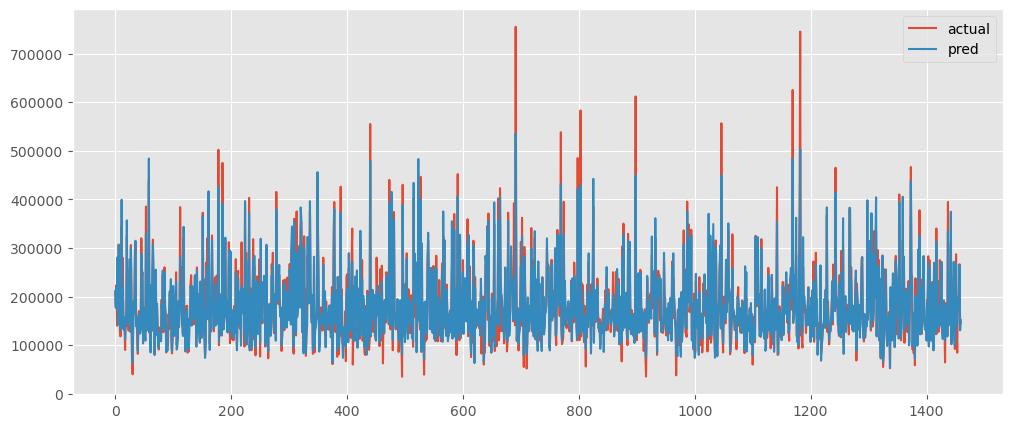

In [141]:
actual_pred_df.plot(figsize=(12,5))

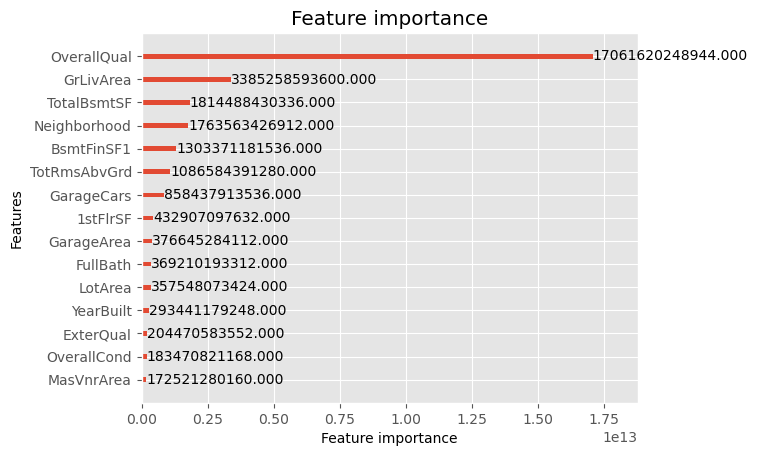

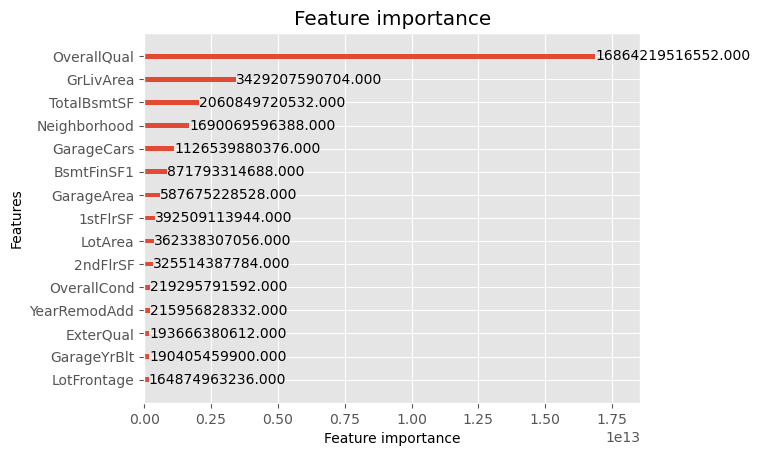

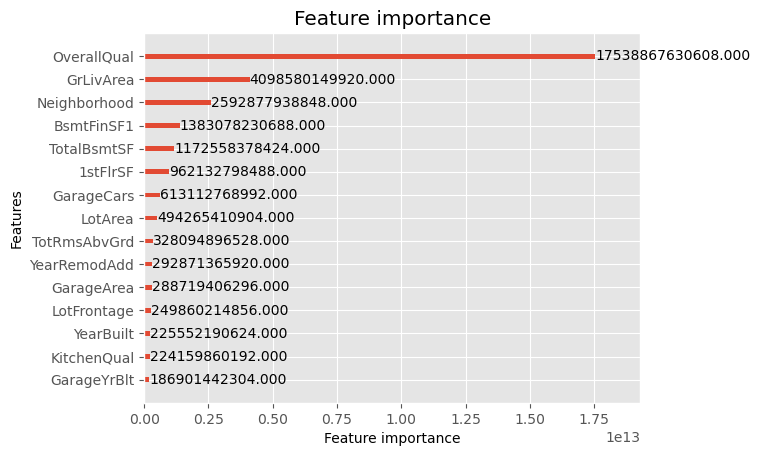

In [142]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

In [143]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

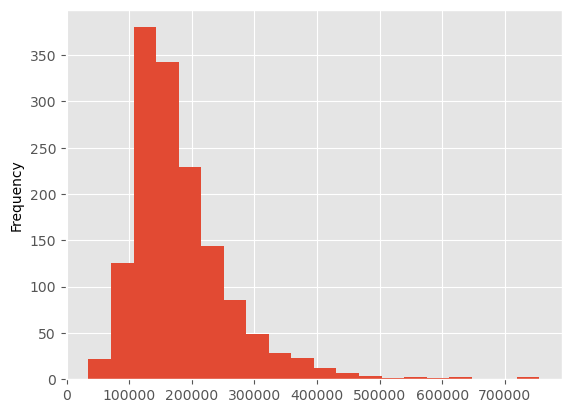

In [144]:
train_df["SalePrice"].plot.hist(bins=20)

In [145]:
np.log(train_df["SalePrice"])


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

<Axes: ylabel='Frequency'>

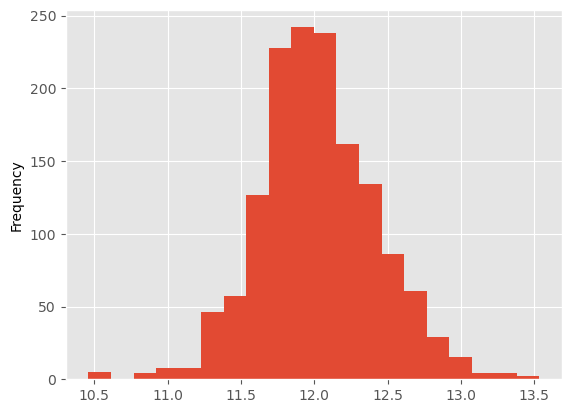

In [146]:
np.log(train_df["SalePrice"]).plot.hist(bins=20)

In [147]:
pd.options.mode.chained_assignment = None
train_df_le["SalePrice_log"] = np.log(train_df["SalePrice"])
train_X = train_df_le.drop(["SalePrice", "SalePrice_log"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [148]:
import warnings
warnings.filterwarnings("ignore")

models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 3186
[LightGBM] [Info] Number of data: 973, number of used features: 73
[LightGBM] [Info] Start training from score 12.017607
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0437319
[20]	valid_0's l2: 0.0218224
[30]	valid_0's l2: 0.0173973
[40]	valid_0's l2: 0.0162261
[50]	valid_0's l2: 0.0160633
[60]	valid_0's l2: 0.0159648
[70]	valid_0's l2: 0.0158675
[80]	valid_0's l2: 0.0158977
Early stopping, best iteration is:
[63]	valid_0's l2: 0.0158347
0.12582193205915593
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data: 973, number of used features: 73
[LightGBM] [Info] Start training from score 12.025976
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0479628
[20]	valid_0's l2: 0.0273225
[30]	valid_0's l2: 0.0227591
[40]	valid_0's l2: 0.0214748
[50]	valid_0's l2: 0.0209623
[60]	valid_0's l2: 0.0207613
[70]	valid_0's l2: 0.0207134
[80]	valid_0's l2: 0.0206873
[90]	valid_0's l2: 0

In [149]:
result.append(sum(rmses)/len(rmses))

print(result)


[0.13697846250952908, 0.13321288683430332]


In [150]:
all_df = pd.concat([train_df, test_df,], sort=False).reset_index(drop=True)

In [151]:
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [152]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

In [153]:
all_df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [154]:
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0

In [155]:
all_df.PoolQC.value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [156]:
all_df.loc[~all_df["MiscFeature"].isnull(), "MiscFeature"] = 1
all_df.loc[all_df["MiscFeature"].isnull(), "MiscFeature"] = 0

In [157]:
all_df.loc[~all_df["Alley"].isnull(), "Alley"] = 1
all_df.loc[all_df["Alley"].isnull(), "Alley"] = 0

In [158]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [159]:
all_df["hasHighFacility"] =all_df["hasHighFacility"].astype(int)

In [160]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

In [161]:
all_df = all_df.drop(["PoolQC", "MiscFeature", "Alley"], axis=1)

In [162]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [163]:
train_df_num = train_df.select_dtypes(include=[np.number])

In [164]:
nonratio_features = ['id', 'MSSubClass', 'OverallCond', 'YearBuilt', 'MoSold', 'YrSold']

In [165]:
num_features = sorted(list(set(train_df_num)-set(nonratio_features)))

In [166]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearRemodAdd']

In [167]:
train_df_num_rs = train_df_num[num_features] 

In [168]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col]==0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [169]:
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
OverallQual 10
PoolArea 8
TotRmsAbvGrd 12


In [170]:
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std() * 3) | \
    (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std() * 3)] 

    print(col, len(tmp_df))
    

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
Id 0
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
OverallQual 2
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22
YearRemodAdd 0


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

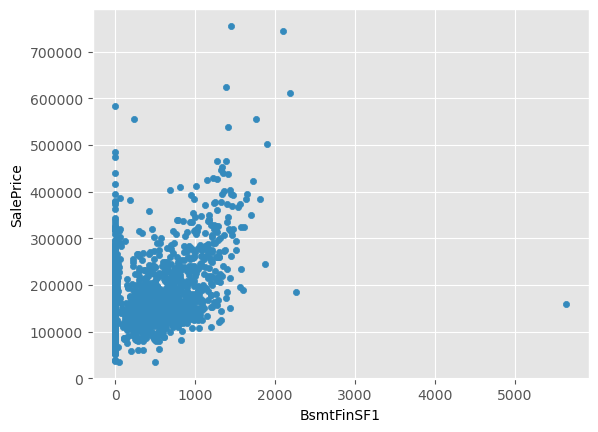

In [171]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [172]:
all_df[all_df["TotalBsmtSF"] > 5000]#[["TotalBsmtSF", "SalePrice"]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

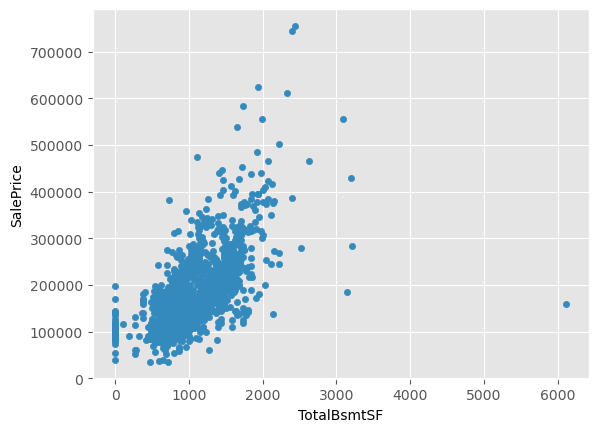

In [173]:
all_df.plot.scatter(x="TotalBsmtSF", y='SalePrice')

In [174]:
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

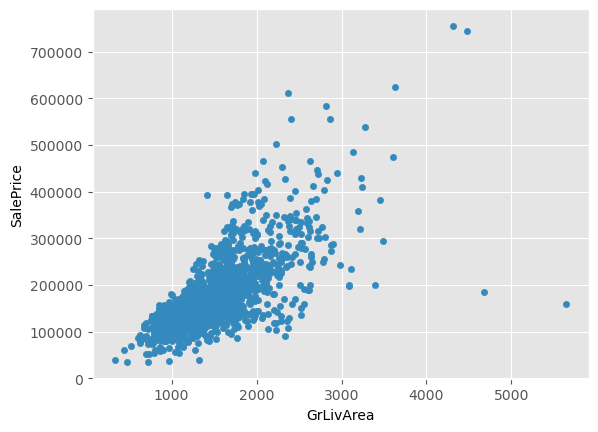

In [175]:
all_df.plot.scatter(x='GrLivArea', y='SalePrice')

In [176]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

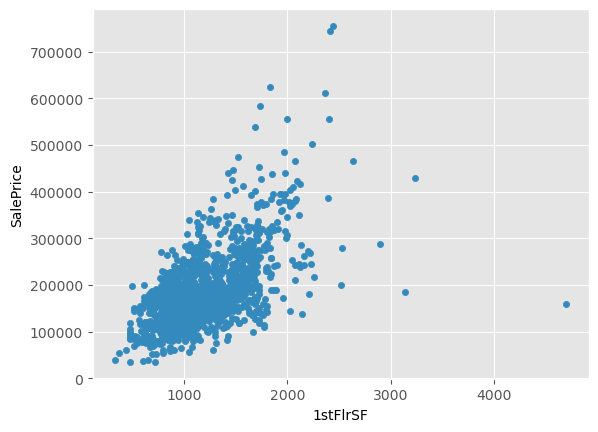

In [177]:
all_df.plot.scatter(x="1stFlrSF", y='SalePrice')

In [178]:
all_df[all_df['1stFlrSF'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


In [179]:
all_df = all_df[(all_df["BsmtFinSF1"] < 2000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["TotalBsmtSF"] < 3000) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["GrLivArea"] < 4500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["1stFlrSF"] < 2500) | (all_df["SalePrice"].isnull())]
all_df = all_df[(all_df["LotArea"] < 10000) | (all_df["SalePrice"].isnull())]

In [180]:
categories = categories.drop(["PoolQC", 'MiscFeature', 'Alley'])

In [181]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [182]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [183]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data: 557, number of used features: 69
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0344771
[Ligh

In [184]:
result.append(sum(rmses) / len(rmses))


In [185]:
print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842]


In [186]:
all_df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2295.000000,2295.000000,2150.000000,2295.000000
mean,1970.213072,1983.442702,1977.384186,2007.800871
std,30.605719,21.271568,26.175435,1.309545
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1951.000000,1963.000000,1959.000000,2007.000000
50%,1972.000000,1992.000000,1979.000000,2008.000000
75%,2000.000000,2003.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [187]:
all_df['Age'] = all_df['YrSold'] - all_df['YearBuilt']
# all_df = all_df.drop(['YrSold', 'YearBuilt'], axis=1)
# all_df['GarageAge'] = all_df['YrSold'] - all_df['GarageYrBlt']

In [188]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [189]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data: 557, number of used features: 70
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0352187
[Ligh

In [190]:
result.append(sum(rmses) / len(rmses))

print(result)



[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337]


In [191]:
all_df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LotFrontage']].describe()

,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2295.000000,2276.000000,2294.000000,2295.000000,2295.00000,2295.000000,2295.000000,2294.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,1950.000000
mean,8889.566449,90.452109,545.081953,1112.132462,315.40610,4.154248,1431.692810,450.726678,86.973856,44.905882,24.190850,1.781699,14.704575,1.359913,65.688718
std,4346.447797,167.087651,423.944232,367.247419,408.65849,44.022550,462.137246,211.210886,121.853336,65.620297,64.978993,19.190070,52.125576,27.122480,21.007830
min,1300.000000,0.000000,0.000000,334.000000,0.00000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7000.000000,0.000000,216.000000,858.500000,0.00000,0.000000,1092.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
50%,8688.000000,0.000000,460.000000,1043.000000,0.00000,0.000000,1374.000000,460.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,65.000000
75%,10167.000000,142.000000,785.000000,1326.500000,672.00000,0.000000,1668.000000,572.000000,159.000000,65.000000,0.000000,0.000000,0.000000,0.000000,76.000000
max,56600.000000,1600.000000,2140.000000,5095.000000,1862.00000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,200.000000


In [192]:
all_df["TotalSF"] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] +all_df['2ndFlrSF']
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df['HalfBath'] + all_df['BsmtFullBath'] + all_df['BsmtHalfBath']

In [193]:
all_df['Total_PorchSF'] = all_df['WoodDeckSF'] +all_df['OpenPorchSF'] + all_df['EnclosedPorch'] + all_df['3SsnPorch'] + all_df['ScreenPorch']


In [194]:
all_df['hasPorch'] = all_df['Total_PorchSF'].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop('Total_PorchSF', axis=1)

In [195]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [196]:
models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data: 557, number of used features: 73
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0339167
[Ligh

In [197]:
result.append(sum(rmses)/len(rmses))
print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337, 0.13127460288065507]


In [198]:
import optuna

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [201]:
def objective(trial):
    params = {
        "objective":"regression",
        "random_seed":1234,
        "learnign_rate":0.05,
        "n_estimator":1000,
        "num_leaves":trial.suggest_int("num_leaves", 4, 64),
        "max_bin":trial.suggest_int("max_bin", 50, 200),
        "bagging_fraction":trial.suggest_uniform("bagging_fraction", 0.4, 0.9),
        "bagging_freq":trial.suggest_int("bagging_freq", 1, 10),
        "feature_fraction":trial.suggest_uniform("feature_fraction", 0.4, 0.9),
        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf", 2, 16),
        "min_sum_hessian_in_leaf":trial.suggest_int("min_sum_hessian_in_leaf", 1, 10)
    }
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10
                        )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    return score

In [202]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1883
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2023-06-05 23:33:33,457] Trial 0 finished with value: 0.1202822720661343 and parameters: {'num_leaves': 48, 'max_bin': 97, 'bagging_fraction': 0.7575946831862097, 'bagging_freq': 4, 'feature_fraction': 0.8289728088113784, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.1202822720661343.
[I 2023-06-05 23:33:33,521] Trial 1 finished with value: 0.12507785751775552 and parameters: {'num_leaves': 23, 'max_bin': 71, 'bagging_fraction': 0.5921908536463499, 'bagging_freq': 8, 'feature_fraction': 0.8458865003910399, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 0 with value: 0.1202822720661343.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l2: 0.014817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[I 2023-06-05 23:33:33,613] Trial 2 finished with value: 0.12338418563605398 and parameters: {'num_leaves': 42, 'max_bin': 89, 'bagging_fraction': 0.6644474598764523, 'bagging_freq': 9, 'feature_fraction': 0.5963923980504149, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 0 with value: 0.1202822720661343.
[I 2023-06-05 23:33:33,660] Trial 3 finished with value: 0.13423187368312012 and parameters: {'num_leaves': 13, 'max_bin': 198, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 4, 'feature_fraction': 0.8785775794765232, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 0 with value: 0.1202822720661343.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2566
[LightGBM] [Info] Number of data: 668, number of used features: 79
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0311035
[20]	valid_0's l2: 0.0199075
[30]	valid_0's l2: 0.0181218
[40]	valid_0's l2: 0.0183698
Early stopping, best iteration is:
[26]	valid_0's l2: 0.0180182
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data: 668, n

[I 2023-06-05 23:33:33,763] Trial 4 finished with value: 0.1234779011371242 and parameters: {'num_leaves': 39, 'max_bin': 79, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 8, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.1202822720661343.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l2: 0.0152693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[71]	valid_0's l2: 0.0152468
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from 

[I 2023-06-05 23:33:33,840] Trial 5 finished with value: 0.1221013070131322 and parameters: {'num_leaves': 36, 'max_bin': 81, 'bagging_fraction': 0.4529538035938961, 'bagging_freq': 8, 'feature_fraction': 0.5322778060523135, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 3}. Best is trial 0 with value: 0.1202822720661343.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0149087
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1646
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learni

[I 2023-06-05 23:33:33,971] Trial 6 finished with value: 0.11800815775184502 and parameters: {'num_leaves': 59, 'max_bin': 78, 'bagging_fraction': 0.6842169744343243, 'bagging_freq': 1, 'feature_fraction': 0.5620705038966071, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 7}. Best is trial 6 with value: 0.11800815775184502.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l2: 0.0142436
Did not meet early stopping. Best iteration is:
[86]	valid_0's l2: 0.0139259
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown paramete

[I 2023-06-05 23:33:34,053] Trial 7 finished with value: 0.11978675724750461 and parameters: {'num_leaves': 44, 'max_bin': 67, 'bagging_fraction': 0.8718740392573121, 'bagging_freq': 10, 'feature_fraction': 0.6249749949556138, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-05 23:33:34,099] Trial 8 finished with value: 0.12527369919696565 and parameters: {'num_leaves': 5, 'max_bin': 107, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 8, 'feature_fraction': 0.4854547925680226, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.


[60]	valid_0's l2: 0.0143809
[70]	valid_0's l2: 0.0144374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[59]	valid_0's l2: 0.0143489
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1974
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0375538
[20]	valid_0's l2: 0.0246261
[30]	valid_0's l2: 0.020736
[40]	valid_0's l2: 0.0187841
[50]	valid_0's l2: 0.0171657
[60]	valid_0's l2: 0.0169389
[70]	valid_0's l2: 0.0165887
[80]	valid_0's l2: 0.016125
[90]	valid_0's l2: 0.0158985
[100]	vali

[I 2023-06-05 23:33:34,152] Trial 9 finished with value: 0.12701484611714114 and parameters: {'num_leaves': 18, 'max_bin': 149, 'bagging_fraction': 0.5818553854713113, 'bagging_freq': 10, 'feature_fraction': 0.4192127132363674, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-05 23:33:34,202] Trial 10 finished with value: 0.12784521983581826 and parameters: {'num_leaves': 10, 'max_bin': 97, 'bagging_fraction': 0.5044383780474173, 'bagging_freq': 4, 'feature_fraction': 0.8976497838389439, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 9}. Best is trial 6 with value: 0.11800815775184502.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1889
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0333123
[20]	valid_0's l2: 0.0218722
[30]	valid_0's l2: 0.0190355
[40]	valid_0's l2: 0.0175121
[50]	valid_0's l2: 0.0167393
[60]	valid_0's l2: 0.0163444
[70]	valid_0's l2: 0.0165448
[80]	valid_0's l2: 0.0166327
Early stopping, best iteration is:
[60]	valid_0's l2: 0.0163444
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM]

[I 2023-06-05 23:33:34,262] Trial 11 finished with value: 0.12642141289998135 and parameters: {'num_leaves': 18, 'max_bin': 193, 'bagging_fraction': 0.6373487511442064, 'bagging_freq': 8, 'feature_fraction': 0.5690038074194459, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-05 23:33:34,340] Trial 12 finished with value: 0.1275805638201466 and parameters: {'num_leaves': 52, 'max_bin': 99, 'bagging_fraction': 0.7891727410129545, 'bagging_freq': 4, 'feature_fraction': 0.5843625853304821, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.


[20]	valid_0's l2: 0.0189849
[30]	valid_0's l2: 0.0168907
[40]	valid_0's l2: 0.0165367
[50]	valid_0's l2: 0.0160918
[60]	valid_0's l2: 0.0159824
[70]	valid_0's l2: 0.0163155
[80]	valid_0's l2: 0.0163572
Early stopping, best iteration is:
[60]	valid_0's l2: 0.0159824
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0284579
[20]	valid_0's l2: 0.0177297
[30]	valid_0's l2: 0.0163731
[40]	valid_0's l2: 0.0163973
[50]	valid_0's l2: 0.0164432
[60]	valid_0's l2: 0.0163543
Early stopping, best iter

[I 2023-06-05 23:33:34,420] Trial 13 finished with value: 0.1207070769609134 and parameters: {'num_leaves': 53, 'max_bin': 86, 'bagging_fraction': 0.44804920394698156, 'bagging_freq': 4, 'feature_fraction': 0.6343256008238508, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.


Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0319825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2023-06-05 23:33:34,513] Trial 14 finished with value: 0.12002375647467918 and parameters: {'num_leaves': 43, 'max_bin': 199, 'bagging_fraction': 0.7696317896991509, 'bagging_freq': 1, 'feature_fraction': 0.6208554606244228, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 6 with value: 0.11800815775184502.


[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2023-06-05 23:33:34,638] Trial 15 finished with value: 0.13101296680213848 and parameters: {'num_leaves': 63, 'max_bin': 180, 'bagging_fraction': 0.7443305914028853, 'bagging_freq': 4, 'feature_fraction': 0.8591177331810724, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 3}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-05 23:33:34,763] Trial 16 finished with value: 0.12842468420094405 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.5326947454697227, 'bagging_freq': 10, 'feature_fraction': 0.8605788051185999, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 7}. Best is trial 6 with value: 0.11800815775184502.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2023-06-05 23:33:34,852] Trial 17 finished with value: 0.12671267291596205 and parameters: {'num_leaves': 47, 'max_bin': 154, 'bagging_fraction': 0.7337051899818409, 'bagging_freq': 4, 'feature_fraction': 0.7235870700937778, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 1}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-05 23:33:34,930] Trial 18 finished with value: 0.12452148434743991 and parameters: {'num_leaves': 42, 'max_bin': 69, 'bagging_fraction': 0.5989103763793145, 'bagging_freq': 4, 'feature_fraction': 0.4100537730937468, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 6 with value: 0.11800815775184502.
[I 2023-06-05 23:33:34,977] Trial 19 finished with value: 0.11742714544104153 and parameters: {'num_leaves': 6, 'max_bin': 53, 'bagging_fraction': 0.7518686396449581, 'bagging_freq': 1, 'feature_fraction': 0.5243765717599791, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1522
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2023-06-05 23:33:35,042] Trial 20 finished with value: 0.12192224938875965 and parameters: {'num_leaves': 30, 'max_bin': 117, 'bagging_fraction': 0.8763745057584925, 'bagging_freq': 1, 'feature_fraction': 0.8232043362355639, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data: 668, number of used features: 74
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0295727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-06-05 23:33:35,103] Trial 21 finished with value: 0.11976023108610309 and parameters: {'num_leaves': 17, 'max_bin': 171, 'bagging_fraction': 0.5982528704234924, 'bagging_freq': 9, 'feature_fraction': 0.5248981378274891, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.032185
[20]	valid_0's l2: 0.0187419
[30]	valid_0's l2: 0.0160799
[40]	valid_0's l2: 0.0149907
[50]	valid_0's l2: 0.0148868
[60]	valid_0's l2: 0.0144142
[70]	valid_0's l2: 0.0143425
[80]	valid_0's l2: 0.0146273
[90]	valid_0's l2: 0.0151177
Early stopping, best iteration is:
[70]	valid_0's l2: 0.0143425
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data: 668, number of used features: 74
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training fro

[I 2023-06-05 23:33:35,246] Trial 22 finished with value: 0.12187967702419235 and parameters: {'num_leaves': 50, 'max_bin': 75, 'bagging_fraction': 0.6942325425343747, 'bagging_freq': 10, 'feature_fraction': 0.6506621909633512, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's l2: 0.0155273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-05 23:33:35,335] Trial 23 finished with value: 0.12479694125927085 and parameters: {'num_leaves': 37, 'max_bin': 154, 'bagging_fraction': 0.6119275242790898, 'bagging_freq': 10, 'feature_fraction': 0.6350660946278825, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's l2: 0.0311066


[I 2023-06-05 23:33:35,431] Trial 24 finished with value: 0.1221783148006888 and parameters: {'num_leaves': 60, 'max_bin': 129, 'bagging_fraction': 0.7745849185763624, 'bagging_freq': 9, 'feature_fraction': 0.46773703211122514, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l2: 0.0150403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-05 23:33:35,501] Trial 25 finished with value: 0.12478790495313113 and parameters: {'num_leaves': 51, 'max_bin': 143, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 7, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11742714544104153.
[I 2023-06-05 23:33:35,549] Trial 26 finished with value: 0.12586705241856302 and parameters: {'num_leaves': 7, 'max_bin': 53, 'bagging_fraction': 0.5837809350239482, 'bagging_freq': 7, 'feature_fraction': 0.8920211206820732, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11742714544104153.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l2: 0.0156601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-05 23:33:35,619] Trial 27 finished with value: 0.11601166265138267 and parameters: {'num_leaves': 27, 'max_bin': 93, 'bagging_fraction': 0.4501134436561506, 'bagging_freq': 9, 'feature_fraction': 0.5761558306002665, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 6}. Best is trial 27 with value: 0.11601166265138267.


[70]	valid_0's l2: 0.0134587
[80]	valid_0's l2: 0.0140261
[90]	valid_0's l2: 0.0148037
Early stopping, best iteration is:
[70]	valid_0's l2: 0.0134587
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2313
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

[I 2023-06-05 23:33:35,700] Trial 28 finished with value: 0.12297220686848548 and parameters: {'num_leaves': 32, 'max_bin': 161, 'bagging_fraction': 0.41877969191407016, 'bagging_freq': 4, 'feature_fraction': 0.48342375652424985, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:35,784] Trial 29 finished with value: 0.12350343734181911 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.6056983618777273, 'bagging_freq': 4, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l2: 0.0155289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-05 23:33:35,876] Trial 30 finished with value: 0.12000726140169456 and parameters: {'num_leaves': 45, 'max_bin': 181, 'bagging_fraction': 0.6100376848953053, 'bagging_freq': 3, 'feature_fraction': 0.8331911629643146, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:35,970] Trial 31 finished with value: 0.12590689941435362 and parameters: {'num_leaves': 43, 'max_bin': 111, 'bagging_fraction': 0.7649952812120291, 'bagging_freq': 3, 'feature_fraction': 0.6605183031020647, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 6}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2006
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0289417
[20]	valid_0's l2: 0.018685
[30]	valid_0's l2: 0.0168888
[40]	valid_0's l2: 0.0162076
[50]	valid_0's l2: 0.0160032
[60]	valid_0's l2: 0.0160519
[70]	valid_0's l2: 0.0158727
[80]	valid_0's l2: 0.0159402
Early stopping, best iteration is:
[64]	valid_0's l2: 0.0158525
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] 

[I 2023-06-05 23:33:36,070] Trial 32 finished with value: 0.12250866737276142 and parameters: {'num_leaves': 44, 'max_bin': 86, 'bagging_fraction': 0.48549329934156576, 'bagging_freq': 3, 'feature_fraction': 0.5119623440301901, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 0.0183857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-06-05 23:33:36,126] Trial 33 finished with value: 0.12254508601789275 and parameters: {'num_leaves': 12, 'max_bin': 179, 'bagging_fraction': 0.7918221226509443, 'bagging_freq': 4, 'feature_fraction': 0.7107392007498818, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 5}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:36,205] Trial 34 finished with value: 0.12106479723417404 and parameters: {'num_leaves': 40, 'max_bin': 75, 'bagging_fraction': 0.5336312689407392, 'bagging_freq': 4, 'feature_fraction': 0.8321407213431223, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 2}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0318964
[20]	valid_0's l2: 0.0191613
[30]	valid_0's l2: 0.016513
[40]	valid_0's l2: 0.0158257
[50]	valid_0's l2: 0.0155326
[60]	valid_0's l2: 0.0151331
[70]	valid_0's l2: 0.015137
[80]	valid_0's l2: 0.0154983
Early stopping, best iteration is:
[64]	valid_0's l2: 0.0150173
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data: 668, number of used features: 74
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [

[I 2023-06-05 23:33:36,312] Trial 35 finished with value: 0.11991474508709803 and parameters: {'num_leaves': 37, 'max_bin': 196, 'bagging_fraction': 0.6771212175422201, 'bagging_freq': 5, 'feature_fraction': 0.5049218744875611, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:36,375] Trial 36 finished with value: 0.12351686664900818 and parameters: {'num_leaves': 16, 'max_bin': 94, 'bagging_fraction': 0.7697753975246437, 'bagging_freq': 3, 'feature_fraction': 0.8851183415480504, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.


[80]	valid_0's l2: 0.0148637
Early stopping, best iteration is:
[63]	valid_0's l2: 0.0143795
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0305116
[20]	valid_0's l2: 0.0190091
[30]	valid_0's l2: 0.0163039
[40]	valid_0's l2: 0.0156832
[50]	valid_0's l2: 0.0156076
[60]	valid_0's l2: 0.0157512
[70]	valid_0's l2: 0.0152981
[80]	valid_0's l2: 0.0154441
Early stopping, best iteration is:
[69]	valid_0's l2: 0.0152564
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unkn

[I 2023-06-05 23:33:36,447] Trial 37 finished with value: 0.12409362478042726 and parameters: {'num_leaves': 43, 'max_bin': 200, 'bagging_fraction': 0.6172083127790604, 'bagging_freq': 7, 'feature_fraction': 0.8405022811008375, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l2: 0.015704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's l2: 0.0155115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2023-06-05 23:33:36,533] Trial 38 finished with value: 0.127089136669303 and parameters: {'num_leaves': 53, 'max_bin': 91, 'bagging_fraction': 0.41233936419566564, 'bagging_freq': 6, 'feature_fraction': 0.771917272654894, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:36,611] Trial 39 finished with value: 0.1279703083906129 and parameters: {'num_leaves': 31, 'max_bin': 123, 'bagging_fraction': 0.7035225305582258, 'bagging_freq': 2, 'feature_fraction': 0.8951694736983522, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 27 with value: 0.11601166265138267.


[50]	valid_0's l2: 0.0162643
[60]	valid_0's l2: 0.01644
[70]	valid_0's l2: 0.0161722
Early stopping, best iteration is:
[52]	valid_0's l2: 0.0161516
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2106
[LightGBM] [Info] Number of data: 668, number of used features: 79
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0296357
[20]	valid_0's l2: 0.0187327
[30]	valid_0's l2: 0.0167038
[40]	valid_0's l2: 0.0166196
[50]	valid_0's l2: 0.0164891
[60]	valid_0's l2: 0.0167254
[70]	valid_0's l2: 0.0166564
Early stopping, best iteration is:
[54]	valid_0's l2: 0.0163764


[I 2023-06-05 23:33:36,667] Trial 40 finished with value: 0.12211672222673099 and parameters: {'num_leaves': 20, 'max_bin': 156, 'bagging_fraction': 0.4686102100485973, 'bagging_freq': 9, 'feature_fraction': 0.7791893269180707, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0273312
[20]	valid_0's l2: 0.0170452
[30]	valid_0's l2: 0.015166
[40]	valid_0's l2: 0.0152137
[50]	valid_0's l2: 0.0156722
Early stopping, best iteration is:
[35]	valid_0's l2: 0.0149125
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2203
[LightGBM] [

[I 2023-06-05 23:33:36,716] Trial 41 finished with value: 0.12579856677639664 and parameters: {'num_leaves': 12, 'max_bin': 141, 'bagging_fraction': 0.5623414860332328, 'bagging_freq': 8, 'feature_fraction': 0.4000276784325043, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:36,797] Trial 42 finished with value: 0.12210483043464902 and parameters: {'num_leaves': 27, 'max_bin': 63, 'bagging_fraction': 0.8426688298047929, 'bagging_freq': 9, 'feature_fraction': 0.8763958284859723, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 5}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data: 668, number of used features: 79
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0288305
[20]	valid_0's l2: 0.0170241
[30]	valid_0's l2: 0.0154371
[40]	valid_0's l2: 0.0150969
[50]	valid_0's l2: 0.0152967
[60]	valid_0's l2: 0.0150346
[70]	valid_0's l2: 0.0149604
[80]	valid_0's l2: 0.0149607
[90]	valid_0's l2: 0.0151688
Early stopping, best iteration is:
[77]	valid_0's l2: 0.0149096
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parame

[I 2023-06-05 23:33:36,882] Trial 43 finished with value: 0.12201867544384379 and parameters: {'num_leaves': 29, 'max_bin': 82, 'bagging_fraction': 0.7654279033850789, 'bagging_freq': 7, 'feature_fraction': 0.5568461962540149, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 27 with value: 0.11601166265138267.


[10]	valid_0's l2: 0.0293004
[20]	valid_0's l2: 0.0180121
[30]	valid_0's l2: 0.0155946
[40]	valid_0's l2: 0.0156756
[50]	valid_0's l2: 0.0154403
[60]	valid_0's l2: 0.0151646
[70]	valid_0's l2: 0.0150965
[80]	valid_0's l2: 0.0149809
[90]	valid_0's l2: 0.0149894
[100]	valid_0's l2: 0.0149266
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.0148886
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2390
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0293358
[20]	valid_0's l2: 0.0189103
[30]	valid_0's l2: 0.0166908
[40]	valid_

[I 2023-06-05 23:33:36,948] Trial 44 finished with value: 0.12328324838449645 and parameters: {'num_leaves': 26, 'max_bin': 172, 'bagging_fraction': 0.5037350377205547, 'bagging_freq': 9, 'feature_fraction': 0.7652210882833972, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:37,000] Trial 45 finished with value: 0.12135365342492185 and parameters: {'num_leaves': 12, 'max_bin': 189, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 5, 'feature_fraction': 0.4874544371547538, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 27 with value: 0.11601166265138267.


[50]	valid_0's l2: 0.0152676
[60]	valid_0's l2: 0.0157637
[70]	valid_0's l2: 0.0163719
Early stopping, best iteration is:
[51]	valid_0's l2: 0.0151988
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 2497
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0325776
[20]	valid_0's l2: 0.0194794
[30]	valid_0's l2: 0.0165063
[40]	valid_0's l2: 0.0155743
[50]	valid_0's l2: 0.0149909
[60]	valid_0's l2: 0.0148127
[70]	valid_0's l2: 0.0147918
Early stopping, best iteration is:
[56]	valid_0's l2: 0.0147267
[LightGBM] [Warning] Unknown parameter: n_estima

[I 2023-06-05 23:33:37,075] Trial 46 finished with value: 0.1270935378825768 and parameters: {'num_leaves': 39, 'max_bin': 155, 'bagging_fraction': 0.8202142662677163, 'bagging_freq': 3, 'feature_fraction': 0.47242387967168864, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 27 with value: 0.11601166265138267.


[10]	valid_0's l2: 0.0287507
[20]	valid_0's l2: 0.0184223
[30]	valid_0's l2: 0.0168347
[40]	valid_0's l2: 0.0163323
[50]	valid_0's l2: 0.0161745
[60]	valid_0's l2: 0.0163524
Early stopping, best iteration is:
[48]	valid_0's l2: 0.0161528
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1514
[LightGBM] [Info] Number of data: 668, number of used features: 77
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2023-06-05 23:33:37,234] Trial 47 finished with value: 0.13005483569594015 and parameters: {'num_leaves': 64, 'max_bin': 68, 'bagging_fraction': 0.7734971200997518, 'bagging_freq': 2, 'feature_fraction': 0.8518598698729667, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 27 with value: 0.11601166265138267.
[I 2023-06-05 23:33:37,320] Trial 48 finished with value: 0.12116305054189933 and parameters: {'num_leaves': 34, 'max_bin': 109, 'bagging_fraction': 0.6922380344778845, 'bagging_freq': 4, 'feature_fraction': 0.5460737633962744, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 10}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1984
[LightGBM] [Info] Number of data: 668, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2023-06-05 23:33:37,404] Trial 49 finished with value: 0.11982873890561371 and parameters: {'num_leaves': 48, 'max_bin': 63, 'bagging_fraction': 0.4082148147957371, 'bagging_freq': 7, 'feature_fraction': 0.4046200367432704, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 27 with value: 0.11601166265138267.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l2: 0.0161766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

{'num_leaves': 27,
 'max_bin': 93,
 'bagging_fraction': 0.4501134436561506,
 'bagging_freq': 9,
 'feature_fraction': 0.5761558306002665,
 'min_data_in_leaf': 8,
 'min_sum_hessian_in_leaf': 6}

In [203]:
lgbm_params = {
        "objective":"regression",
        "random_seed":1234,
        "learnign_rate":0.05,
        "n_estimator":1000,
        'num_leaves': 27,
        'max_bin': 93,
        'bagging_fraction': 0.4501134436561506,
        'bagging_freq': 9,
        'feature_fraction': 0.5761558306002665,
        'min_data_in_leaf': 8,
        'min_sum_hessian_in_leaf': 6
    }

In [204]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice", 'SalePrice_log', "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

models =[]
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train, 
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                          )
    y_pred = model_lgb.predict(x_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Total Bins 1749
[LightGBM] [Info] Number of data: 557, number of used features: 75
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: learnign_rate
[LightGBM] [Info] Start training from score 11.882235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [205]:
result.append(sum(rmses)/len(rmses))

print(result)

[0.13697846250952908, 0.13321288683430332, 0.13036240684673842, 0.13214437832611337, 0.13127460288065507, 0.12841066453974667]


In [206]:
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [207]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)
    


In [208]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [209]:
preds_exp = np.exp(preds_mean)


In [210]:
len(preds_exp)

1459

In [211]:
submission["SalePrice"] = preds_exp

In [212]:
submission.to_csv("../submit/houseprices_submit01.csv", index=False)

In [213]:
from sklearn.ensemble import RandomForestRegressor as rf


In [214]:
hasnan_cat = []
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if(tmp_null_count>0)&(col!="SalePrice"):
        print(col, tmp_null_count)
        hasnan_cat.append(col)
                          

LotFrontage 345
MasVnrArea 19
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 145
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [215]:
all_df[hasnan_cat].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,TotalSF,Total_Bathrooms
count,1950.000000,2276.000000,2294.000000,2294.000000,2294.000000,2294.000000,2293.000000,2293.000000,2150.000000,2294.000000,2294.000000,2294.000000,2293.000000
mean,65.688718,90.452109,415.126853,47.057541,545.081953,1007.266347,0.419102,0.060183,1977.384186,1.692241,450.726678,2435.036617,2.364152
std,21.007830,167.087651,426.964614,163.711374,423.944232,411.478730,0.521042,0.245105,26.175435,0.760082,211.210886,733.393393,0.939935
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,334.000000,1.000000
25%,54.000000,0.000000,0.000000,0.000000,216.000000,768.000000,0.000000,0.000000,1959.000000,1.000000,308.000000,1926.250000,2.000000
50%,65.000000,0.000000,341.500000,0.000000,460.000000,954.500000,0.000000,0.000000,1979.000000,2.000000,460.000000,2345.500000,2.000000
75%,76.000000,142.000000,694.000000,0.000000,785.000000,1240.000000,1.000000,0.000000,2002.000000,2.000000,572.000000,2849.750000,3.000000
max,200.000000,1600.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,10190.000000,8.000000


In [216]:
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if(tmp_null_count>0)&(col!="SalePrice"):
        print(col, tmp_null_count)
        all_df[col] = all_df[col].fillna(all_df[col].median())

LotFrontage 345
MasVnrArea 19
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 145
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [222]:

train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]
train_df_le["SalePrice_log"] = np.log(test_df_le["SalePrice"])
all_df.isnull().count()

Id                 2295
MSSubClass         2295
MSZoning           2295
LotFrontage        2295
LotArea            2295
                   ... 
hasHighFacility    2295
Age                2295
TotalSF            2295
Total_Bathrooms    2295
hasPorch           2295
Length: 83, dtype: int64

In [218]:
folds = 3
kf = KFold(n_splits=folds)

In [219]:
models_rf = []
rmses_rf = []
oof_rf = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    x_train = train_X.iloc[train_index]
    x_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    model_rf = rf(
        n_estimators=50,
        random_state=1234
    )
    
    model_rf.fit(x_train, y_train)
    y_pred = model_rf.predict(x_valid)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_rf.append(models_rf)
    rmses_rf.append(tmp_rmse)
    oof_rf[val_index] = y_pred

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values